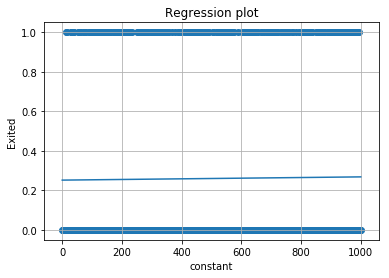

properties= LinregressResult(slope=1.6399600399600408e-05, intercept=0.2518001998001998, rvalue=0.010803746957504155, pvalue=0.7329325982980708, stderr=4.804721777966415e-05)


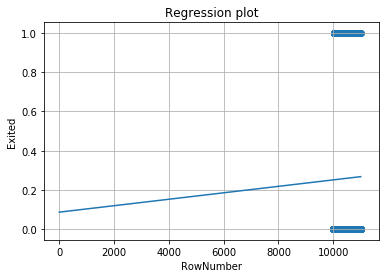

properties= LinregressResult(slope=1.6416016416016434e-05, intercept=0.08762361962361945, rvalue=0.010803746957504159, pvalue=0.7329325982980708, stderr=4.809531309275691e-05)


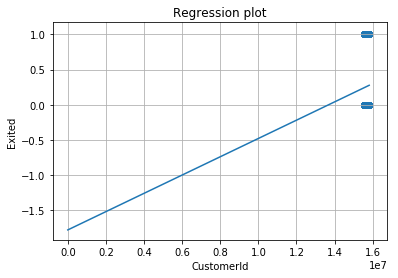

properties= LinregressResult(slope=1.3022564099563266e-07, intercept=-1.7835965781394354, rvalue=0.021702387915131162, pvalue=0.49302079971550117, stderr=1.8989844660209302e-07)


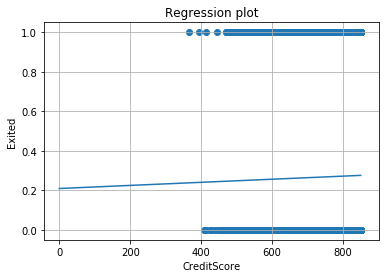

properties= LinregressResult(slope=7.831216888873518e-05, intercept=0.20892582150896247, rvalue=0.017476429819163992, pvalue=0.5809454907087954, stderr=0.00014182243305410963)


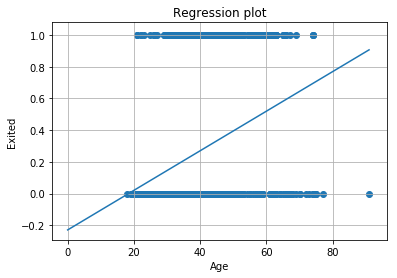

properties= LinregressResult(slope=0.012480391411611048, intercept=-0.2294809511633853, rvalue=0.3061367276327601, pvalue=3.8570560873476385e-23, stderr=0.0012285102109404796)


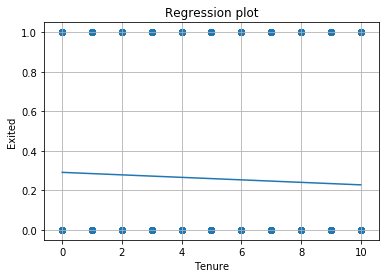

properties= LinregressResult(slope=-0.0063324039506639515, intercept=0.29077548320022684, rvalue=-0.042001438679175274, pvalue=0.18446682163468206, stderr=0.0047682142540662435)


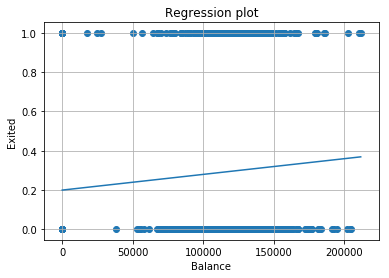

properties= LinregressResult(slope=7.990803245740819e-07, intercept=0.19994110126979728, rvalue=0.1146677866223835, pvalue=0.0002795267144933638, stderr=2.1913391387598407e-07)


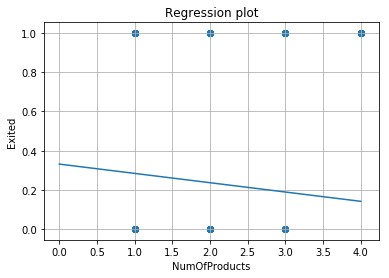

properties= LinregressResult(slope=-0.04735886568899076, intercept=0.33203283471295497, rvalue=-0.06365214266876064, pvalue=0.044179801333132165, stderr=0.023503980268870364)


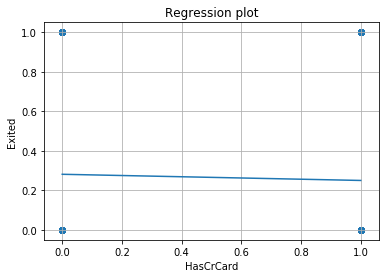

properties= LinregressResult(slope=-0.031249999999999962, intercept=0.28125, rvalue=-0.033233565178443496, pvalue=0.2937580238568668, stderr=0.029748690444065966)


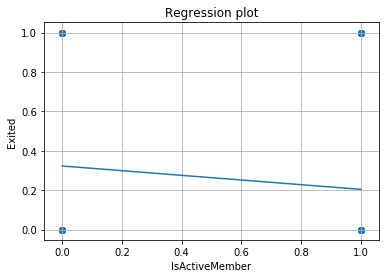

properties= LinregressResult(slope=-0.11855883191054678, intercept=0.3227176220806793, rvalue=-0.13491792944314845, pvalue=1.862814019495998e-05, stderr=0.027561944741686294)


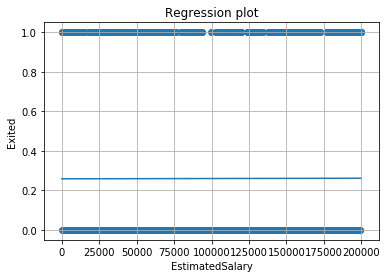

properties= LinregressResult(slope=1.4607225705903529e-08, intercept=0.2585173613226088, rvalue=0.0019258965212518252, pvalue=0.9514977197023152, stderr=2.4008703880522613e-07)


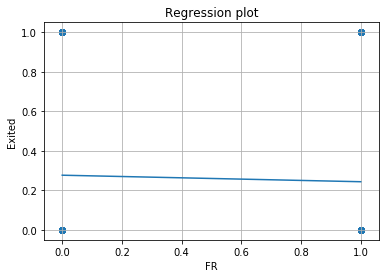

properties= LinregressResult(slope=-0.033040132160528715, intercept=0.2765531062124249, rvalue=-0.03766243348867429, pvalue=0.23407653987426982, stderr=0.02774980236220451)


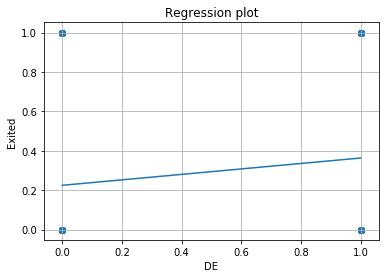

properties= LinregressResult(slope=0.13881888440860182, intercept=0.22446236559139793, rvalue=0.138118695070886, pvalue=1.1691764478823273e-05, stderr=0.03150999408638201)


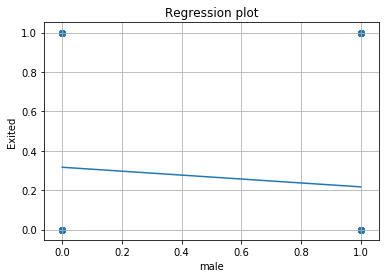

properties= LinregressResult(slope=-0.09946601170619669, intercept=0.31639722863741354, rvalue=-0.11235894381408766, pvalue=0.00037094508345649765, stderr=0.027844726205375425)


In [23]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

test=pd.read_csv('P12-Churn-Modelling.csv')
train=pd.read_csv('P12-Churn-Modelling-Test-Data.csv')
def dummy(df):
    
#Create dummy for Geography
    Fr=[]
    Es=[]
    De=[]
    for i in range (len(df['Geography'])):
        if df['Geography'][i]=='France':
            Fr.append(1)
            Es.append(0)
            De.append(0)
        if df['Geography'][i]=='Germany':
            Fr.append(0)
            Es.append(0)
            De.append(1)
        if df['Geography'][i]=='Spain':
            Fr.append(0)
            Es.append(1)
            De.append(0)
#Create dummy for gender
    ismale=[]
    for i in range (len(df['Gender'])):
        if df['Gender'][i]=='Male':
            ismale.append(1)
        else:
            ismale.append(0)
#One of the dummies can be taken as a benchmark in both cases,
#here they are Spain and Female which are taken as bench mark and their information is implicit
    df['FR'] = Fr
    df['DE'] = De
    df['male'] = ismale
    df=df.drop(columns=['Geography','Gender','Surname'])
    return df
train=dummy(train)
test=dummy(test)
#Regression to explore correlations
data=train
def regression(df,dependent,SL=0.05):#(dataframe,dependent column name in dataframe[string])
    '''
    Outputs linear regression between the dependent variable of choice and all other
    variables present in the dataframe, inluding constant values.
    SL=maximal p-value to be considered
    Returns dataframes with statistically significant predictors and plots 
    of single regression for a sanity check
    The coefficients correspond to a multiple linear regression if and only if they are 
    orthogonal in the vector space, better said, they are not interdependent
    at the time this code was written, there was some conflict between libraries
    and multiple linear regression methods raised errors
    it is useful either way to see the individual correlations
    and choose eventually which feature to use to train an MLP
    '''
    predictors=pd.DataFrame()
    independent=df.drop([dependent],axis=1)
    dependente=df[dependent]
    x=np.linspace(0,len(dependente),len(dependente))
    m,q,r,p,std=stats.linregress(x,dependente)  
    y=m*x+q
    plt.plot(x,y)
    plt.scatter(x,dependente)
    plt.grid(True)
    plt.title('Regression plot')
    plt.xlabel('constant')
    plt.ylabel(dependent)
    plt.show()
    print('properties=',stats.linregress(x,dependente))
    for i in list(independent):
        m,q,r,p,std=stats.linregress(independent[i],dependente)
        x=np.linspace(0,max(independent[i]),100)
        y=m*x+q
        plt.plot(x,y)
        plt.scatter(independent[i],dependente)
        plt.grid(True)
        plt.title('Regression plot')
        plt.xlabel(i)
        plt.ylabel(dependent)
        plt.show()
        print('properties=',stats.linregress(independent[i],dependente))
        if p<SL:
            predictors[i]=independent[i]
    if len(list(predictors))==2:
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.scatter(predictors.iloc[:,0], predictors.iloc[:,1], dependente)
    #reg = LinearRegression().fit(np.array(predictors), np.array(dependente))        
    return predictors
predictors=regression(data,'Exited',SL=0.20)#high cutoff here a further one can be introduced down the line



In [24]:
import statsmodels.discrete.discrete_model as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(train)
A=pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns) #if values close to 1 --> all good, values >5 are to be investigated
#print('VIF=',A)
#print("Correlation Matrix=",train.corr())
# logistic regression
y=train['Exited']
X=predictors
# sm
logit = sm.Logit(y, X)
result=logit.fit()
print(result.summary2())



Optimization terminated successfully.
         Current function value: 0.526120
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.082     
Dependent Variable: Exited           AIC:              1066.2393 
Date:               2020-07-19 13:49 BIC:              1100.5936 
No. Observations:   1000             Log-Likelihood:   -526.12   
Df Model:           6                LL-Null:          -573.06   
Df Residuals:       993              LLR p-value:      4.7415e-18
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Age                0.0342   0.0054  6.3327 0.0000  0.0236  0.0448
Tenure            -0.0883   0.0249 -3.5371 0.0004 -0.1372 -0.0393


In [25]:
predictors=predictors.drop(columns=['Balance'])
predictors['Exited']=train['Exited']
test=test.drop(columns=['Balance','RowNumber','CustomerId','EstimatedSalary','CreditScore','FR','HasCrCard'])

Accuracy of logistic regression classifier on test set: 0.81
[[7530  433]
 [1479  558]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7963
           1       0.56      0.27      0.37      2037

    accuracy                           0.81     10000
   macro avg       0.70      0.61      0.63     10000
weighted avg       0.78      0.81      0.78     10000



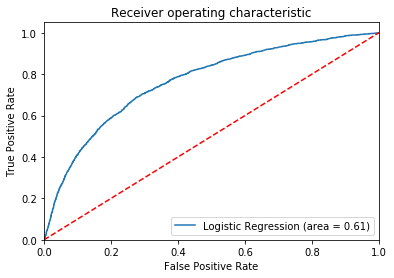

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train=predictors.drop(columns=['Exited'])
X_test=test.drop(columns=['Exited'])
y_train=predictors.Exited
y_test=test.Exited
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()